In [1]:
import random

num_simulations = 10000

count_A = 0
count_B = 0
count_A_and_B = 0

for _ in range(num_simulations):

    balls = ['R'] * 6 + ['B'] * 4 + ['G'] * 6

    drawn_balls = random.sample(balls, 3)

    if 'R' in drawn_balls:
        count_A += 1

    #all balls have the same color
    if len(set(drawn_balls)) == 1:
        count_B += 1

    #all balls have the same color and it is red
        if 'R' in drawn_balls:
            count_A_and_B += 1

print("P(A):", count_A / num_simulations)
print("P(B):", count_B / num_simulations)
print("P(A and B):", count_A_and_B / num_simulations)

probability_B_given_A = count_A_and_B / count_A

print("P(B|A):", probability_B_given_A)

P(A): 0.7917
P(B): 0.0772
P(A and B): 0.0349
P(B|A): 0.044082354427182016


{1: 0.145, 2: 0.17, 3: 0.17, 4: 0.14, 5: 0.18, 6: 0.195}


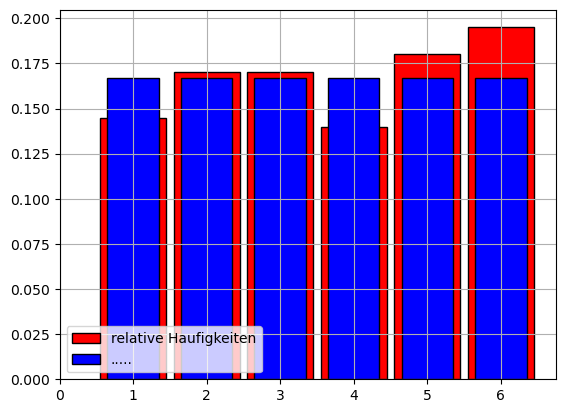

In [3]:
import numpy
from random import randrange
from matplotlib.pyplot import bar, show, hist, grid, legend, xticks
N=200
daten = [randrange(1,7) for _ in range(N)] #print(daten)
z, count = numpy.unique(daten, return_counts=True) 
d=dict([(z[i],count[i]/N) for i in range(0,6)]) 
print(d)
bar(z, count/N, width=0.9,color="red", edgecolor="black", label="relative Haufigkeiten")
D = dict([(k,1/6) for k in range(1,7)])
bar(D.keys(),D.values(), width=0.7,color="blue", edgecolor="black", label=".....")
legend(loc="lower left")

xticks(range(0,7)) 
grid ()
show ()

# Exercise 3

Drei Wu rfel werden geworfen. Das Spiel gewinnt derjenige, der die Summe der drei aufgetauchten Zahlen vorhersagt.
- (1) Man simuliere dieses Spiel N-mal (=500, 1000...), man erstelle das Histogramm der relativen Ha ̈ufigkeiten. Auf demselben Bild zeichne man auch die Balken fur die theoretischen Wahrscheinlichkeiten. Man vergleiche die theoretischen Ergebnisse mit den erhaltenen Werten aus den Simulationen.
- (2) Auf welche Zahl (oder Zahlen) muss man wetten, um die großten Gewinnchancen zu haben? 1
- (3) Welches ist die theoretische Wahrscheinlichkeit, dass diese Zahl (oder Zahlen) auftaucht? Man vergleiche das theoretische Resultat mit den erhaltenen Ergebnissen der Simulationen.

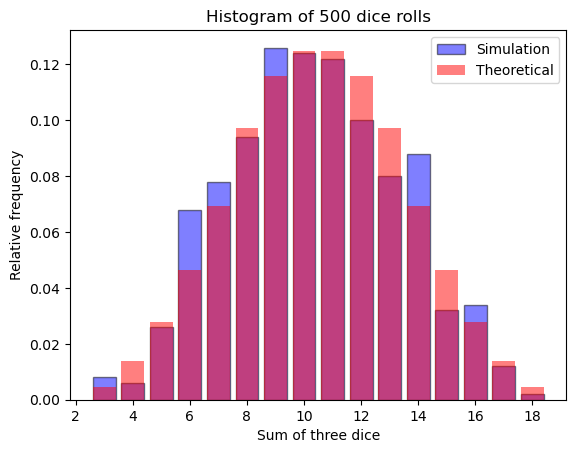

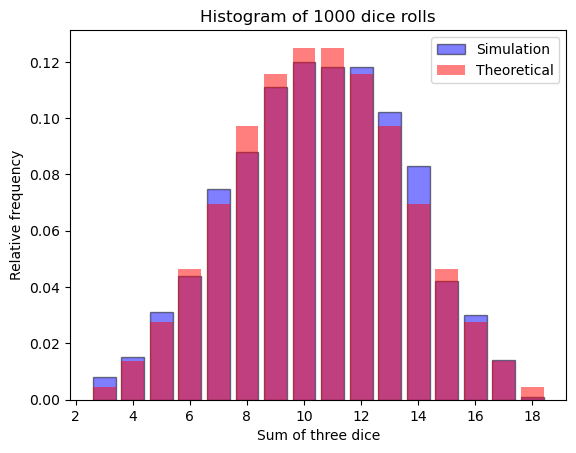

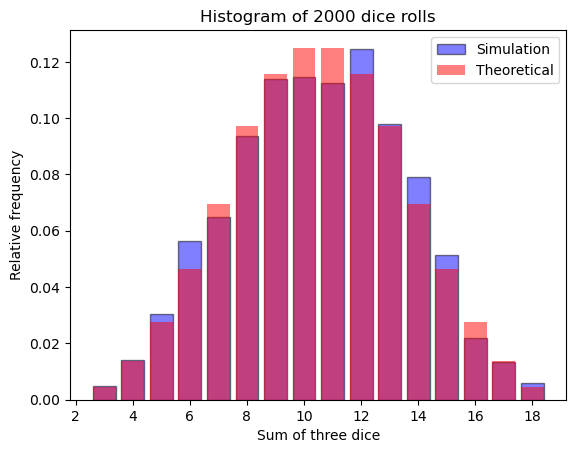

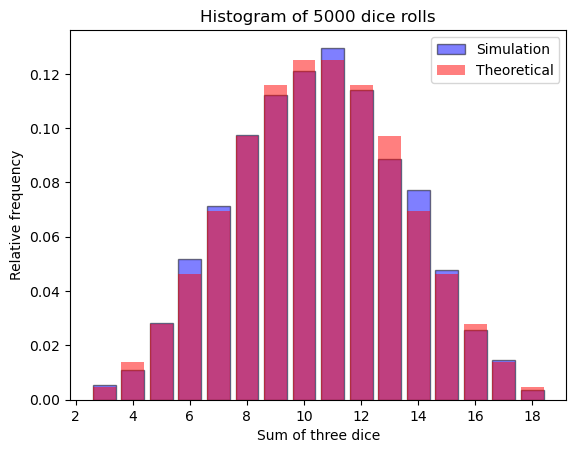

The best number to bet on is 10
The theoretical probability of rolling 10 is 0.125


In [7]:
import random
import matplotlib.pyplot as plt
import numpy as np

def simulate_dice_rolls(n):
    return [random.randint(1,6) + random.randint(1, 6) + random.randint(1, 6) for _ in range(n)]

def theoretical_probabilities():
    counts = [0] * 19
    for i in range(1, 7):
        for j in range(1, 7):
            for k in range(1, 7):
                counts[i + j + k] += 1
    return [count/216 for count in counts]

def plot_histogram(data, theoretical_prob, title):
    plt.hist(data, bins=range(3, 20), align='left', rwidth=0.8, density=True, color='blue', edgecolor='black', alpha=0.5, label='Simulation')
    plt.bar(range(3, 19), theoretical_prob[3:], color='red', alpha=0.5, label='Theoretical')
    plt.title(title)
    plt.xlabel('Sum of three dice')
    plt.ylabel('Relative frequency')
    plt.legend()
    plt.show()

for n in [500, 1000, 2000, 5000]:
    data = simulate_dice_rolls(n)
    theoretical =theoretical_probabilities()
    plot_histogram(data, theoretical, f"Histogram of {n} dice rolls")


best_number = np.argmax(theoretical[3:]) + 3
print('The best number to bet on is', best_number)

print(f"The theoretical probability of rolling {best_number} is {theoretical[best_number]}")


# Exercise 5


Welche ist die Wahrscheinlichkeit, dass in einer Gruppe von 5 Personen genau zwei Personen Geburtstag im selben Monat haben und die anderen drei Personen verschiedene Geburtstage haben? 
- a) Man lose die Aufgabe anhand Simulationen. 
- b) Man gebe die theoretische Wahrscheinlichkeit an. Annahme: die Wahrscheinlichkeit, dass eine zufallig gewahlte Person Geburtstag in einem bestimmten Monat hat ist 1/12.

In [8]:
import random

num_simulations = 100000

count_success = 0

for _ in range(num_simulations):
    birthdays = [random.randint(1, 12) for _ in range(5)]

    if len(set(birthdays)) == 4:
        count_success += 1

P_simulation = count_success / num_simulations

print(f"Simulation Probability = {P_simulation}")

P_theoretical = (12 * 11 * 10 * 9 * (5 * 4 / 2)) / (12 ** 5)

print(f"Theoretical Probability = {P_theoretical}")


Simulation Probability = 0.47688
Theoretical Probability = 0.4774305555555556


# Exercise 6

 Man sch ̈atze anhand Simulationen die Wahrscheinlichkeit, dass beim zweimaligen Werfen eines Würfels die Summe der Zahlen mindestens 7 ist (Summe ≥ 7),
- a) unter der Bedingung, dass beim ersten Wurf eine 4 erhalten wurde;
- b) unter der Bedingung, dass beim zweiten Wurf eine gerade Zahl erhalten wurde.
- c) Welche sind die theoretischen Wahrscheinlichkeiten bei a), bzw. b) ?

In [9]:
num_simulations = 100000

count_success_a = 0
count_success_b = 0

for _ in range(num_simulations):
    roll1 = random.randint(1, 6)
    roll2 = random.randint(1, 6)

    if roll1 == 4 and roll1 + roll2 >= 7:
        count_success_a += 1

    if roll2 % 2 == 0 and roll1 + roll2 >= 7:
        count_success_b += 1


P_simulation_a = count_success_a / num_simulations
P_simualtion_b = count_success_b / num_simulations

print(f"Simulation Probability A = {P_simulation_a}")
print(f"Simulation Probability B = {P_simualtion_b}")

P_theoretical_a = sum(1 for i in range(1,7) if 4 + i >= 7) / 6
P_theoretical_b = sum(1 for i in range(1,7) for j in range(1,7) if j % 2 == 0 and i + j >= 7) / 36

print(f"Theoretical Probability A = {P_theoretical_a}")
print(f"Theoretical Probability B = {P_theoretical_b}")

Simulation Probability A = 0.10976
Simulation Probability B = 0.33269
Theoretical Probability A = 0.6666666666666666
Theoretical Probability B = 0.3333333333333333
